## Install Libraries
1. python3 -m venv proj2env
2. source proj2env/bin/activate
3. pip install --upgrade pip
4. pip install torch
5. pip install torchvision
6. pip install pybind11
7. brew install pybind11

1. conda create --prefix "/Users/rishabhshah/Desktop/AIPI590/Project2/condaprojenv" python=3.11
2. conda activate "/Users/rishabhshah/Desktop/AIPI590/Project2/condaprojenv"
3. conda install pytorch==2.0.1 torchvision==0.15.2 torchaudio==2.0.2 -c pytorch
4. pip install pybind11
5. brew install pybind11  
6. python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
7. pip install opencv-python
<!-- 7. CC=clang CXX=clang++ ARCHFLAGS="-arch x86_64" python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'
1. git clone https://github.com/facebookresearch/detectron2.git
python -m pip install -e detectron2 -->

In [ ]:

# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
# from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("experiment", {}, "/Users/rishabhshah/Desktop/AIPI590/Project2/DatasetDetectron2/annotations/instances_default.json", "/Users/rishabhshah/Desktop/AIPI590/Project2/Dataset/Utensils/images")

In [ ]:
sample_metadata = MetadataCatalog.get("experiment")
dataset_dicts = DatasetCatalog.get("experiment")

In [ ]:
import random
from matplotlib import pyplot as plt


for d in random.sample(dataset_dicts, 1):
    print(d)
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=sample_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    # cv2.imshow("preview", vis.get_image()[:, :, ::-1])
    # cv2.imshow(vis.get_image()[:, :, ::-1])
    # cv2_imshow(vis.get_image()[:, :, ::-1])
    # cv2.imwrite(out_file_name, result_image)
    plt.imshow(vis.get_image()[:, :, ::-1])
    plt.show()

In [ ]:
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("experiment",)
cfg.DATASETS.TEST = ()   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_FPN_3x.yaml")# initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.02
cfg.SOLVER.MAX_ITER = 20   # 300 iterations seems good enough, but you can certainly train longer
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # 3 classes (Person, Helmet, Car)
cfg.MODEL.DEVICE = 'cpu'
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True)
trainer.train()

In [ ]:

# # Look at training curves in tensorboard:
# %load_ext tensorboard
# %tensorboard --logdir output

In [ ]:

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set the testing threshold for this model
cfg.DATASETS.TEST = ("experiment",)
predictor = DefaultPredictor(cfg)

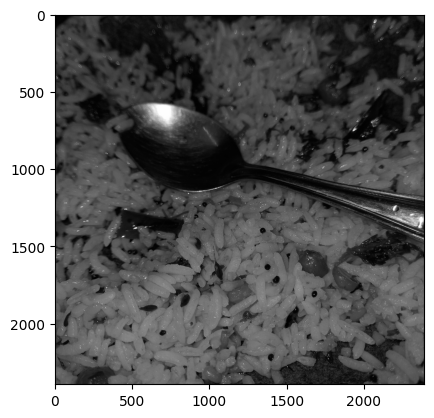

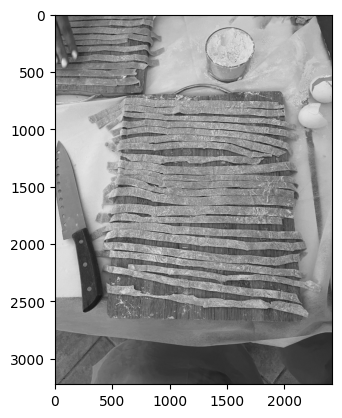

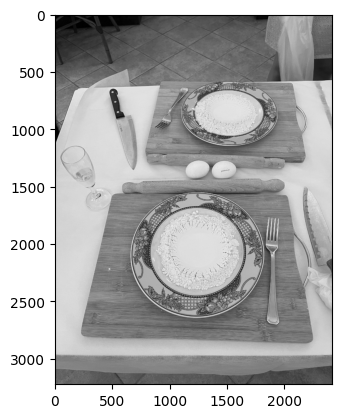

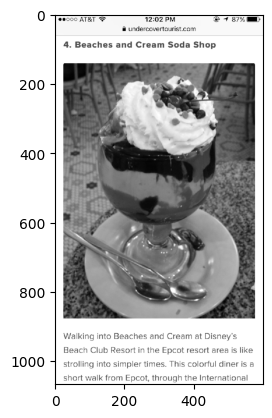

In [10]:
from detectron2.utils.visualizer import ColorMode

for d in random.sample(dataset_dicts, 4):    
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1],
                   metadata=sample_metadata, 
                   scale=0.8, 
                   instance_mode=ColorMode.IMAGE_BW   # remove the colors of unsegmented pixels
    )
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    # cv2_imshow(v.get_image()[:, :, ::-1])
    plt.imshow(v.get_image()[:, :, ::-1])
    plt.show()